# Data Wrangling and Exploratory Data Analysis

## Imports and load data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = "../data/predictive_maintenance.csv"

In [4]:
data = pd.read_csv(data_path)

## First inspection

In [5]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


## Explore Numeric Distributions

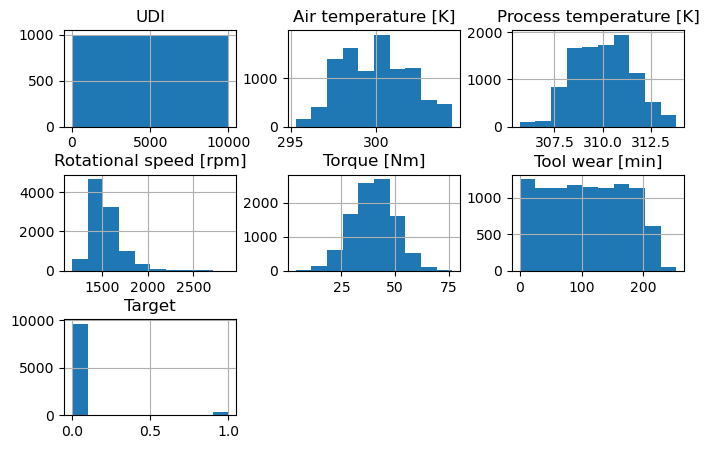

In [8]:
data.hist(figsize = (8,5))
plt.subplots_adjust(hspace = 0.5);

## Explore Categorical Data

In [9]:
data["Product ID"].nunique()

10000

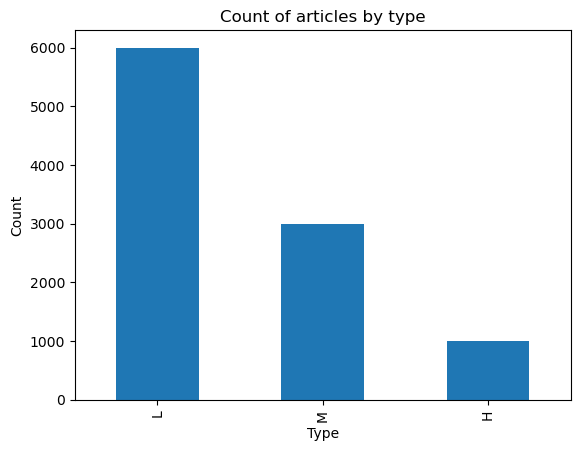

In [15]:
# L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants
data["Type"].value_counts().plot(kind = "bar")
plt.title("Count of articles by type")
plt.xlabel("Type")
plt.ylabel("Count");

In [20]:
id_numeric = data["Product ID"].apply(lambda x: x[1:])
id_numeric.value_counts()

Product ID
14860    1
53850    1
53843    1
53844    1
53845    1
        ..
18193    1
18194    1
50515    1
50516    1
24859    1
Name: count, Length: 10000, dtype: int64

## Explore the target columns

In [11]:
data["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [12]:
data["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [13]:
data[data["Target"] == 0]["Failure Type"].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [14]:
data["Target"].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

## Look for correlation between the variables

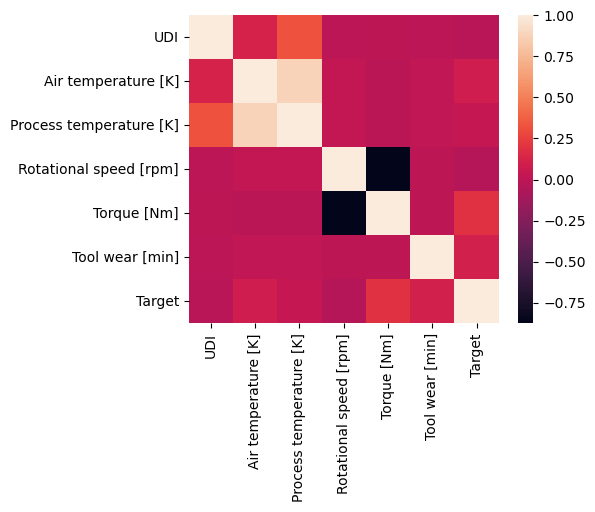

In [23]:
plt.subplots(figsize=(5,4))
sns.heatmap(data.select_dtypes(["int","float"]).corr());